## Análisis de Datos Meteorológicos con una API Pública
Obtener datos del clima de una ciudad usando la API de Open-Meteo (https://open-meteo.com/) y analizar la temperatura.

* Haz una petición a la API para que devuelva el pronóstico de las temperaturas para una semana en Bilbao. El parámetro correspondiente es `temperature_2m` además de la latitud y la longitud.
* Procesa la respuesta en formato JSON para obtener dos listas: una con la lista de temperaturas y otra con las fechas-horas correspondientes.
* Crea un DataFrame con esas dos columnas: `Hora` y `Temperatura`
* Elige la gráfica adecuada y visualiza el pronóstico de temperaturas.

Para crear la variable `Hora` del DataFrame puedes introducir directamente la lista que se obtiene del campo `data["hourly"]["time"]` o procesar esa lista mediante el siguiente código:

`hours = pd.date_range(start=lista_de_horas, periods=len(temps), freq="H")`

In [1]:
import requests
import pandas as pd

# Coordenadas de Bilbao
latitude = 43.2630
longitude = -2.9340


url = f"https://api.open-meteo.com/v1/forecast"
params = {"latitude" : 43.2630, "longitude" : -2.9340,
          "current_weather": "true",
          "hourly": "temperature_2m",
          "timezone": "Europe/Madrid"  # Especificar la zona horaria
          }

response = requests.get(url, params=params)    #Esta línea realiza una solicitud HTTP GET a la URL proporcionada.
# En este caso, está haciendo una petición a la API de Open-Meteo.    #params=params: Es un diccionario que contiene los 
# #parámetros de la solicitud. En este caso, estos parámetros incluyen la latitud, longitud, 
# # y las variables de clima que deseas consultar (temperatura, humedad, velocidad del viento). 
# #params es lo que se pasa como parámetros de consulta en la URL.

if response.status_code == 200:  #Esta propiedad devuelve el código de estado de la respuesta HTTP. 
    #Los códigos de estado indican si la solicitud fue exitosa o si ocurrió algún error. 
    # #200: Significa que la solicitud fue exitosa. Es el código estándar para una "respuesta OK
    
    data = response.json() #método para convertir la respuesta de la API (que generalmente es en formato JSON) en un diccionario de Python que puedes manipular.
    #Esto extrae el contenido de la respuesta en formato JSON y lo convierte a un objeto de Python (en este caso, un diccionario).
    print(data)
else:
    print(f"Error en la solicitud: {response.status_code}")
    print("Detalles del error:", response.text) 

{'latitude': 43.26, 'longitude': -2.9300003, 'generationtime_ms': 0.30493736267089844, 'utc_offset_seconds': 3600, 'timezone': 'Europe/Madrid', 'timezone_abbreviation': 'GMT+1', 'elevation': 31.0, 'current_weather_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature': '°C', 'windspeed': 'km/h', 'winddirection': '°', 'is_day': '', 'weathercode': 'wmo code'}, 'current_weather': {'time': '2025-03-27T16:15', 'interval': 900, 'temperature': 13.9, 'windspeed': 10.0, 'winddirection': 334, 'is_day': 1, 'weathercode': 3}, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'}, 'hourly': {'time': ['2025-03-27T00:00', '2025-03-27T01:00', '2025-03-27T02:00', '2025-03-27T03:00', '2025-03-27T04:00', '2025-03-27T05:00', '2025-03-27T06:00', '2025-03-27T07:00', '2025-03-27T08:00', '2025-03-27T09:00', '2025-03-27T10:00', '2025-03-27T11:00', '2025-03-27T12:00', '2025-03-27T13:00', '2025-03-27T14:00', '2025-03-27T15:00', '2025-03-27T16:00', '2025-03-27T17:00', '2025-03-27T18:00', '2025-03-

In [2]:
print(response.status_code)

200


In [3]:
#  Procesa la respuesta en formato JSON para obtener dos listas: una con la lista de temperaturas y otra con las fechas-horas correspondientes.
#Extraer las temperaturas y las fechas-horas

temperaturas = data["hourly"]["temperature_2m"]
hora = data["hourly"]["time"]
print(temperaturas)
print(hora)

[11.2, 10.6, 10.7, 10.9, 10.5, 10.7, 10.3, 10.4, 10.8, 11.3, 11.5, 12.1, 12.4, 13.3, 13.5, 14.1, 13.9, 13.0, 13.7, 13.6, 12.6, 12.5, 12.4, 12.7, 12.5, 11.7, 11.5, 11.8, 11.7, 11.9, 11.6, 11.7, 12.1, 12.9, 13.3, 14.3, 14.8, 15.4, 15.5, 15.5, 14.9, 14.8, 14.5, 14.3, 13.4, 13.0, 13.0, 12.9, 13.0, 13.1, 12.5, 12.5, 12.1, 11.9, 12.1, 12.0, 12.0, 12.7, 13.4, 12.9, 12.6, 13.1, 13.5, 13.2, 13.3, 13.0, 12.5, 11.8, 10.6, 9.9, 9.5, 9.1, 8.6, 7.8, 7.1, 6.6, 6.2, 5.9, 5.8, 5.4, 5.7, 7.9, 11.0, 12.9, 14.0, 14.6, 14.8, 14.9, 14.6, 13.9, 13.1, 12.0, 10.4, 9.2, 8.3, 7.5, 6.9, 6.6, 6.3, 6.4, 6.6, 6.6, 6.2, 5.7, 6.2, 8.5, 11.8, 13.9, 16.1, 17.4, 18.5, 19.6, 20.1, 19.8, 19.0, 17.8, 16.1, 14.0, 12.3, 11.5, 11.2, 10.8, 10.4, 9.9, 9.6, 9.3, 9.1, 9.0, 11.7, 15.3, 18.5, 20.6, 22.2, 23.5, 24.5, 25.2, 25.3, 24.6, 23.3, 21.6, 19.4, 16.7, 14.6, 13.2, 12.3, 11.7, 11.4, 11.4, 11.2, 10.4, 9.5, 9.7, 12.1, 15.7, 18.8, 20.8, 22.2, 23.4, 24.5, 25.3, 25.3, 24.2, 22.5, 20.5, 18.2, 15.6, 13.6, 12.5]
['2025-03-27T00:00', '20

In [4]:
#Crea un DataFrame con esas dos columnas: `Hora` y `Temperatura`


df = pd.DataFrame({"temperaturas": temperaturas, "hora" :hora })

df.reset_index(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         168 non-null    int64  
 1   temperaturas  168 non-null    float64
 2   hora          168 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [6]:

df

,index,temperaturas,hora
0,0,11.2,2025-03-27T00:00
1,1,10.6,2025-03-27T01:00
2,2,10.7,2025-03-27T02:00
3,3,10.9,2025-03-27T03:00
4,4,10.5,2025-03-27T04:00
...,...,...,...
163,163,20.5,2025-04-02T19:00
164,164,18.2,2025-04-02T20:00
165,165,15.6,2025-04-02T21:00
166,166,13.6,2025-04-02T22:00


In [27]:
# Primero, convierte la columna 'hora' a formato datetime
df['hora'] = pd.to_datetime(df['hora'])

# Luego, extrae solo la fecha (sin las horas)
df['fecha'] = df['hora'].dt.date

In [28]:
!pip install matplotlib



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns 

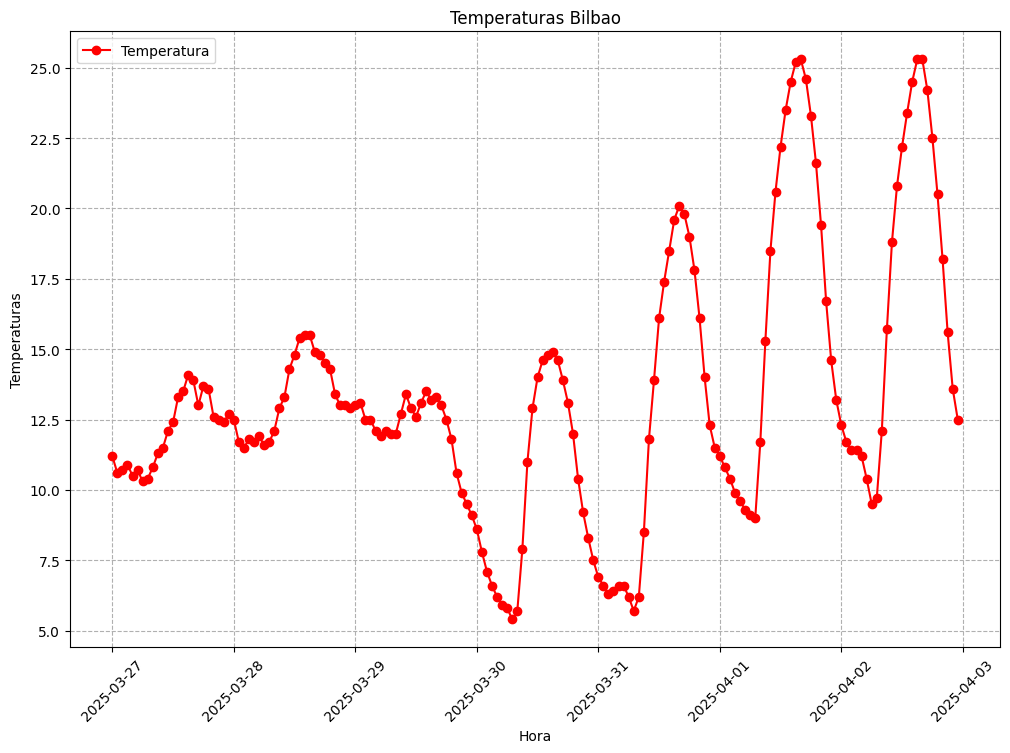

In [31]:
# Elige la gráfica adecuada y visualiza el pronóstico de temperaturas.
plt.figure(figsize=(12,8))
plt.plot(df['hora'], df['temperaturas'], marker='o', color='r', label='Temperatura')
plt.xlabel("Hora")
plt.ylabel("Temperaturas")
plt.xticks(rotation= 45)
plt.grid(True, linestyle= "--")
plt.title("Temperaturas Bilbao")
plt.legend()